In [1]:
#Importy
import pandas as pd
from IPython.display import clear_output
clear_output(wait=True)

In [2]:
#Wczytanie danych z pliku
original_data = pd.read_csv(".\samochody1tys.csv")


<AxesSubplot:xlabel='marka'>

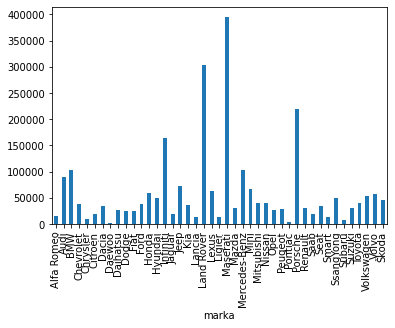

In [3]:
#Wykres pokazujący średnią cenę dla każej marki
df = original_data
df.groupby(by="marka",sort=True).mean()["cena"].plot(kind="bar")


<AxesSubplot:ylabel='Rodzaj silnika'>

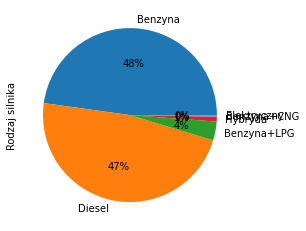

In [4]:
#procentowy udział rodzajów silnika w ofertach
df["rodzaj_silnika"].value_counts().plot.pie(autopct='%.f%%', label = "Rodzaj silnika")

In [5]:
#stworzenie nowego dataframe i dodanie nowej kolumny
mileage = df["przebieg"]
mileage_rate = pd.DataFrame(["Wysoki" if x>200000 else "Niski" for x in mileage])
df["ocena_przebiegu"] = mileage_rate
print(df[["przebieg","ocena_przebiegu"]])

     przebieg ocena_przebiegu
0    160000.0           Niski
1    149000.0           Niski
2     99000.0           Niski
3     93000.0           Niski
4    127428.0           Niski
..        ...             ...
995  182000.0           Niski
996   42700.0           Niski
997  168111.0           Niski
998  226500.0          Wysoki
999   13617.0           Niski

[1000 rows x 2 columns]


In [6]:
#Wyświetlenie 15 samochodów z największą pojemnością silnika
print(df.nlargest(15, 'pojemnosc_silnika')[["marka","model","pojemnosc_silnika"]])


             marka                 model  pojemnosc_silnika
95            Saab                9-3 II           191000.0
160  Mercedes-Benz          Klasa C W204             6208.0
768      Chevrolet                Camaro             6162.0
814  Mercedes-Benz               CL C140             6000.0
586  Mercedes-Benz          Klasa G W463             5500.0
704  Mercedes-Benz          Klasa S W126             5000.0
352  Mercedes-Benz          Klasa S W220             4999.0
855     Land Rover  Range Rover Sport II             4999.0
241  Mercedes-Benz          Klasa S W220             4966.0
611      Chevrolet                Camaro             4903.0
173        Porsche              Panamera             4800.0
405  Mercedes-Benz               SL R231             4663.0
151           Audi                    R8             4200.0
392      Chevrolet           Trailblazer             4200.0
204          Lexus                 LS II             4000.0


In [7]:
#Rozłącz DataFrame i połącz
df = original_data
df1 = df.iloc[:200,:]
df2 = df.iloc[200:,:]
print(df1.tail(5))
print(df2.head(5))

df = pd.concat([df1,df2])

print("długość złączonego DataFrame: " + str(len(df)))

      id       marka           model  rok_produkcji rodzaj_silnika  \
195  195       Volvo           V40 I         2001.0         Diesel   
196  196        Seat          Leon I         2002.0         Diesel   
197  197  Mitsubishi   Outlander III         2016.0        Benzyna   
198  198  Volkswagen  Transporter T5         2007.0         Diesel   
199  199         Kia          Cerato         2005.0         Diesel   

     pojemnosc_silnika  przebieg      cena         wojewodztwo ocena_przebiegu  
195             1900.0  310600.0    4500.0         Małopolskie          Wysoki  
196             1900.0  230700.0   11900.0         Mazowieckie          Wysoki  
197             2000.0       1.0  110990.0           Lubelskie           Niski  
198             2500.0  289000.0   29500.0  Kujawsko-pomorskie          Wysoki  
199             1991.0  143000.0    8999.0  Zachodniopomorskie           Niski  
      id    marka       model  rok_produkcji rodzaj_silnika  \
200  200  Hyundai  Elantra IV 

In [8]:
#Usuwanie kolumn i zapis do pliku
df = pd.read_csv(".\samochody1tys.csv")
df.drop(columns = ["rok_produkcji","wojewodztwo"],inplace=True)

print(df.head(5))

df.to_csv("nowe_samochody.csv")

   id       marka        model rodzaj_silnika  pojemnosc_silnika  przebieg  \
0   0      Nissan  X-Trail III         Diesel             1600.0  160000.0   
1   1         BMW       X1 E84         Diesel             2000.0  149000.0   
2   2        Opel     Zafira A    Benzyna+CNG             1600.0   99000.0   
3   3     Hyundai        i10 I        Benzyna             1100.0   93000.0   
4   4  Volkswagen           CC         Diesel             1968.0  127428.0   

      cena  
0  75900.0  
1  70900.0  
2   9800.0  
3  11900.0  
4  49900.0  
